## Temperature

Results for 1884-1980:
Slope: 0.00479248938315205
P-value: 0.0038405512757431473
Z-score: 2.963811516984808

Results for 1980-2023:
Slope: 0.02983329001733928
P-value: 3.8020671521686445e-06
Z-score: 5.3345052472097265


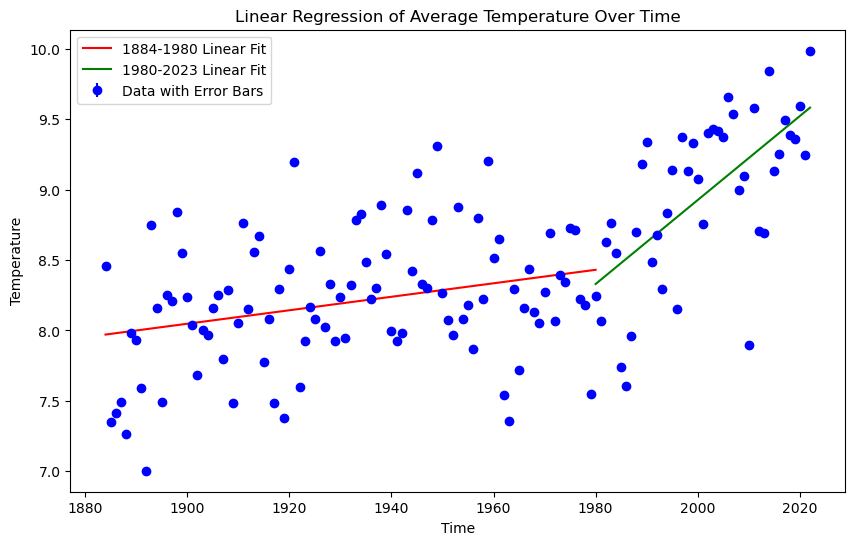

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

# Extract temperature data
tas_array = np.array(data['tas'])
time = np.arange(1884, 2023)

# Compute annual average temperature
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))

temp_future = temp[-10:]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(temp_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1884-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1884-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()



Results for 1980-2013:
Slope: 0.03254808196724132
P-value: 0.0010127492482980682
Z-score: 3.6287826709745903


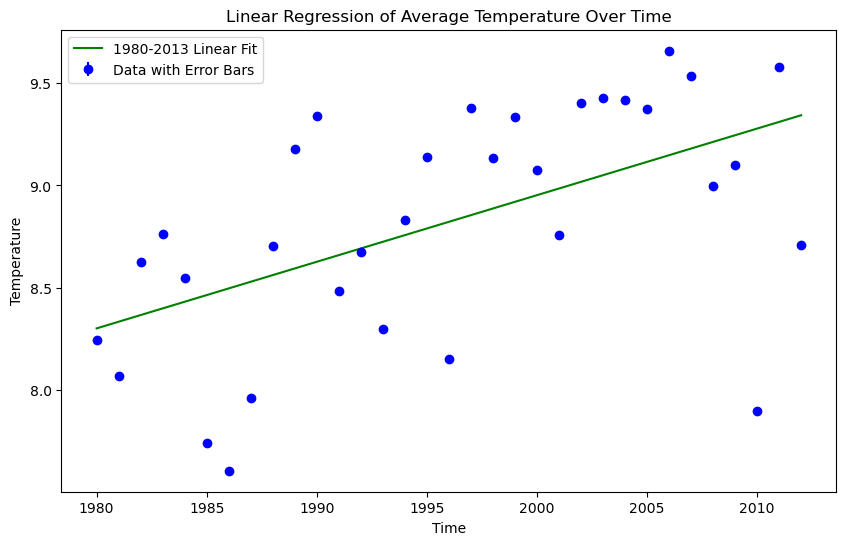

In [13]:
tas_array = np.array(data['tas'])
time = np.arange(1884, 2013)
time_test = np.arange(1980, 2013)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[:-10]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

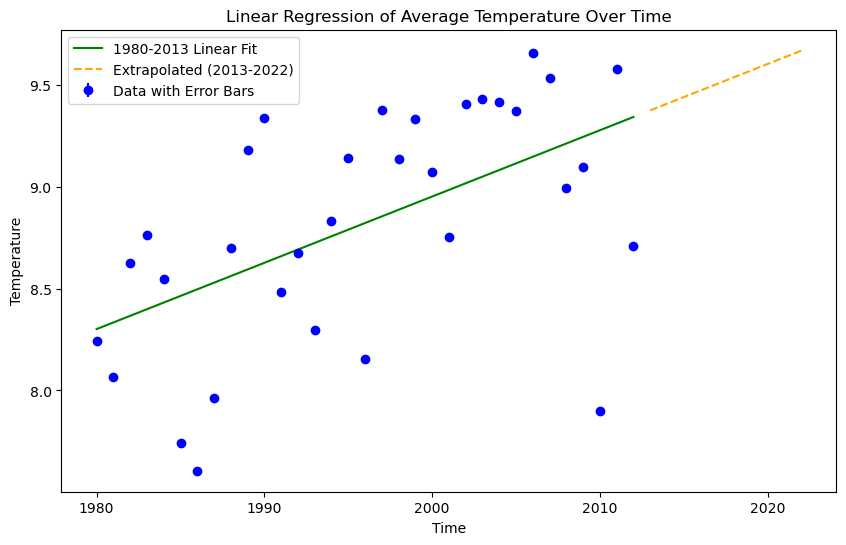

In [14]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_temp = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_temp, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [21]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Temp': temp_future.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Temp': extrapolated_temp_values
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: 0.02983329001733928
Extrapolated Intercept: -50.739979193214815
   Year  Actual Temp  Predicted Temp
0  2013     8.694078        9.375593
1  2014     9.841629        9.408141
2  2015     9.134825        9.440689
3  2016     9.253900        9.473237
4  2017     9.492679        9.505785
5  2018     9.389196        9.538333
6  2019     9.357949        9.570881
7  2020     9.593366        9.603430
8  2021     9.247745        9.635978
9  2022     9.986207        9.668526


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.07182267433581946
Mean Absolute Error: 0.2731356888900507
Mean Squared Error: 0.11135365892379781


Text(0, 0.5, 'Residuals')

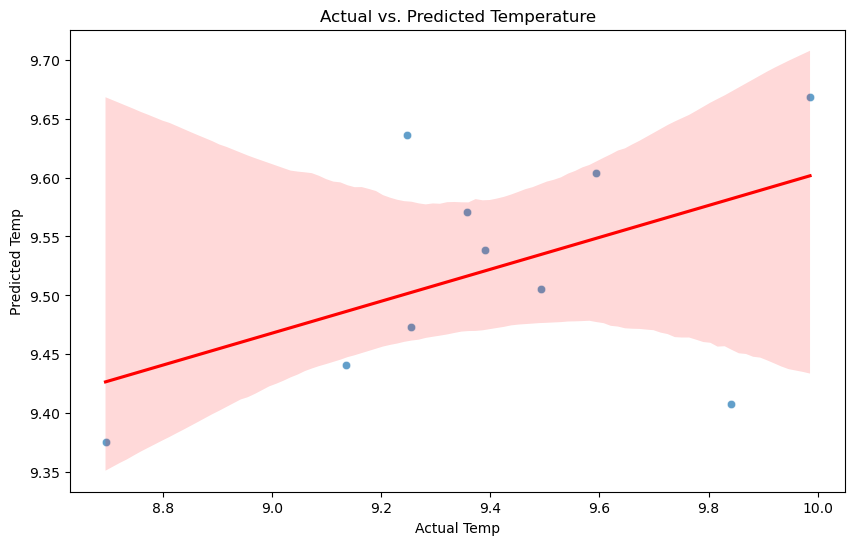

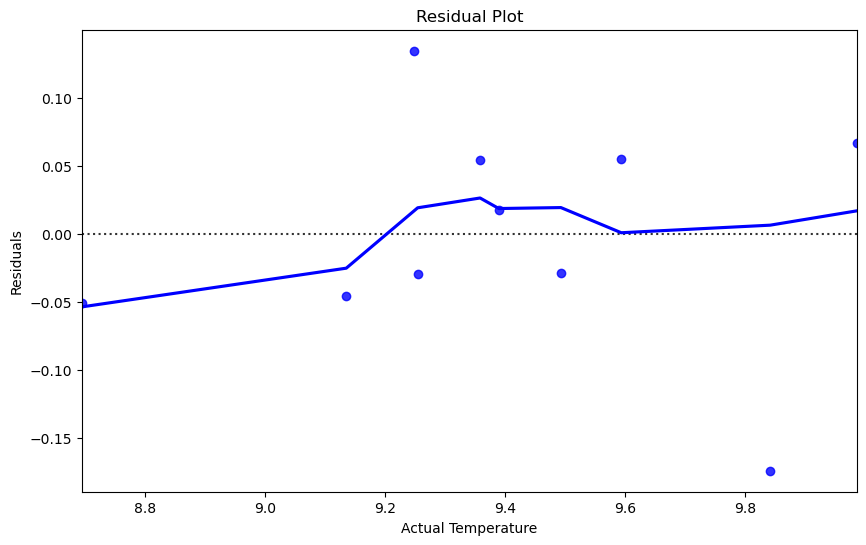

In [23]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Regression line
sns.regplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals')

## Max Temp

Results for 1884-1980:
Slope: 0.002657093596877563
P-value: 0.15873674011233413
Z-score: 1.4204973173458906

Results for 1980-2023:
Slope: 0.03471600716176755
P-value: 1.5016435297433269e-06
Z-score: 5.6196610414717245


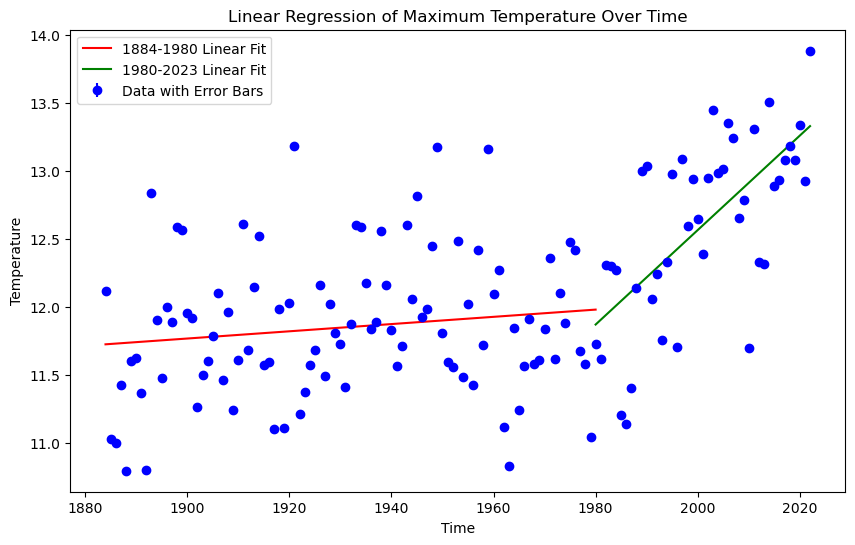

In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

# Load data
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmax\*.nc", parallel=True)

# Extract temperature data
tas_array = np.array(data['tasmax'])
time = np.arange(1884, 2023)

# Compute annual average temperature
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))

temp_future = temp[-10:]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(temp_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1884-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1884-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Maximum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: 0.037806773923653975
P-value: 0.0005987716616527227
Z-score: 3.8212770889544085


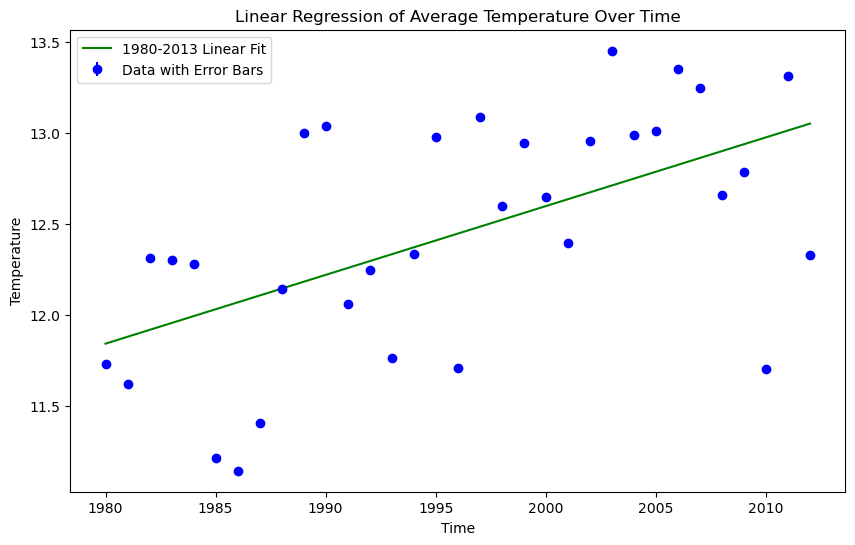

In [26]:
tas_array = np.array(data['tasmax'])
time = np.arange(1884, 2013)
time_test = np.arange(1980, 2013)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[:-10]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Average Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

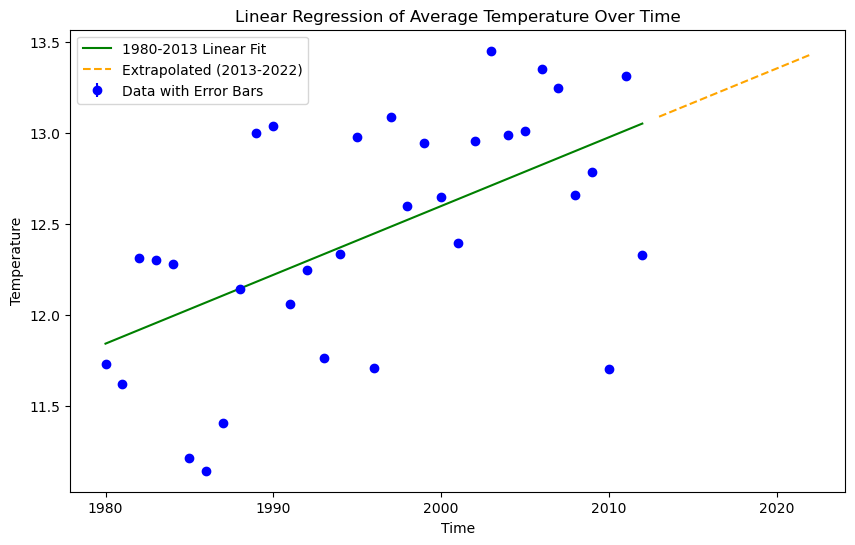

In [27]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_temp = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_temp, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Maximum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [29]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Temp': temp_future.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Temp': extrapolated_temp
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: 0.037806773923653975
Extrapolated Intercept: -63.01736741605333
   Year  Actual Temp  Predicted Temp
0  2013    12.318047       13.087668
1  2014    13.506522       13.125475
2  2015    12.893134       13.163282
3  2016    12.933168       13.201089
4  2017    13.079587       13.238896
5  2018    13.182095       13.276702
6  2019    13.083489       13.314509
7  2020    13.335912       13.352316
8  2021    12.924838       13.390123
9  2022    13.882628       13.427929


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.10194195754086921
Mean Absolute Error: 0.311005954070389
Mean Squared Error: 0.13934849375597977


Text(0, 0.5, 'Residuals')

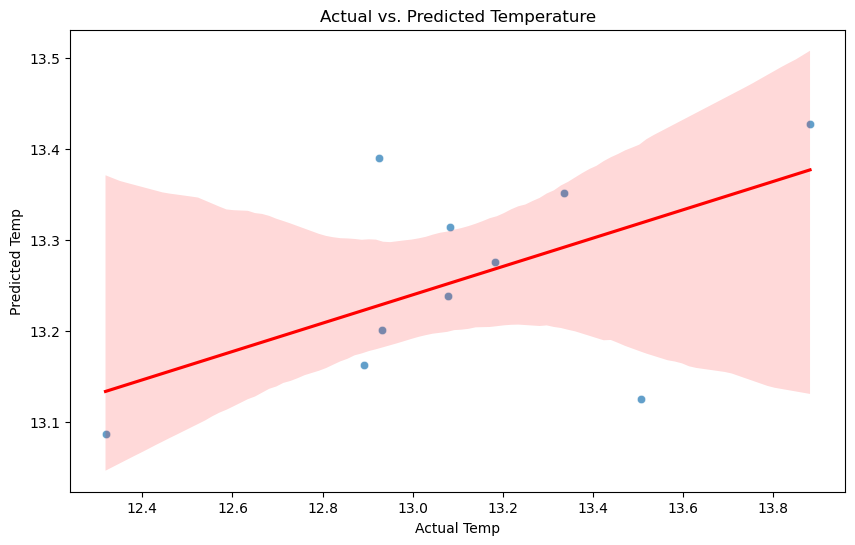

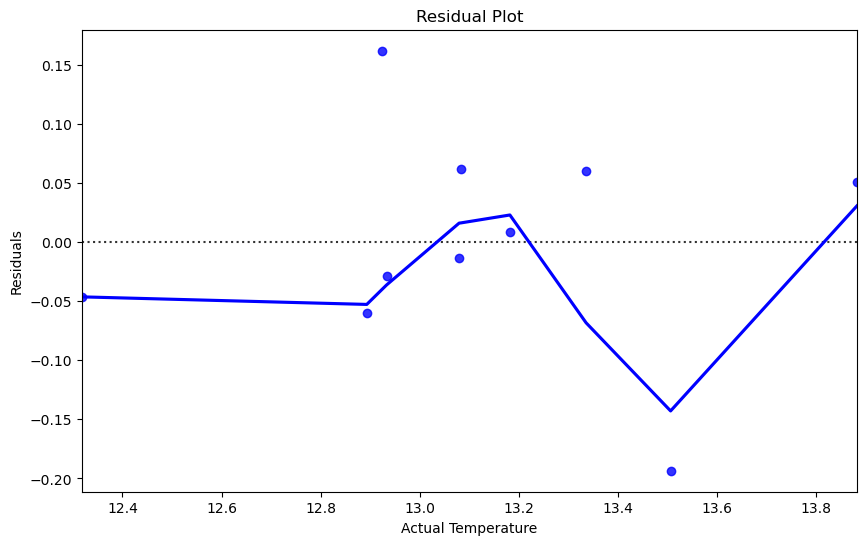

In [31]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Regression line
sns.regplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals')

## Min Temp

Results for 1884-1980:
Slope: 0.006766274891357919
P-value: 1.4701948357661319e-05
Z-score: 4.569304709951053

Results for 1980-2023:
Slope: 0.02505851195692888
P-value: 2.7393492956119135e-05
Z-score: 4.720925456688587


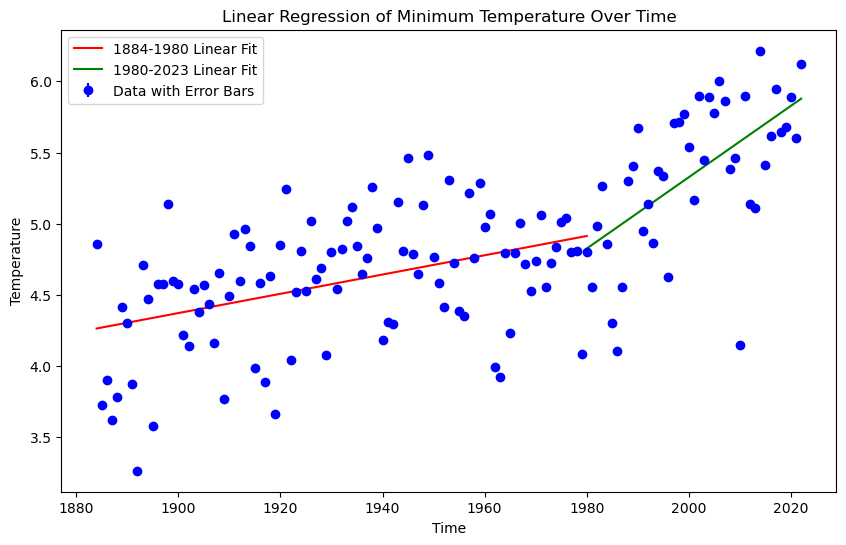

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_tmin\*.nc", parallel=True)

tas_array = np.array(data['tasmin'])
time = np.arange(1884, 2023)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))

temp = np.nanmean(temp, axis=(1, 2))

temp_future = temp[-10:]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(temp_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1884-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, temp, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1884-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Minimum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: 0.02759893628712905
P-value: 0.002892483929181032
Z-score: 3.234558147229011


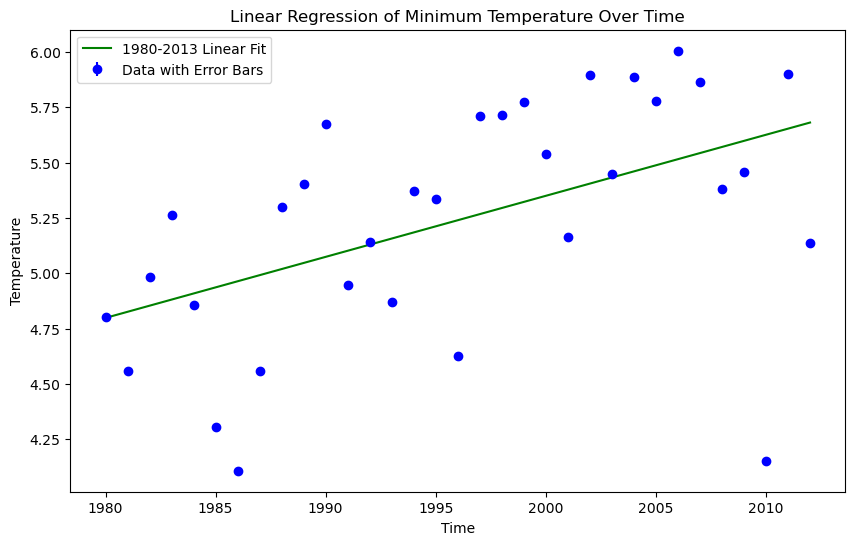

In [4]:
tas_array = np.array(data['tasmin'])
time = np.arange(1884, 2013)
time_test = np.arange(1980, 2013)
temp = block_reduce(tas_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(tas_array))
temp = np.nanmean(temp, axis=(1, 2))
temp = temp[:-10]
err = 0.001

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
temp_segment1 = temp[:len(time_segment1)]

time_segment2 = time[time >= 1980]
temp_segment2 = temp[-len(time_segment2):]

model_segment2 = sm.OLS(temp_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Minimum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

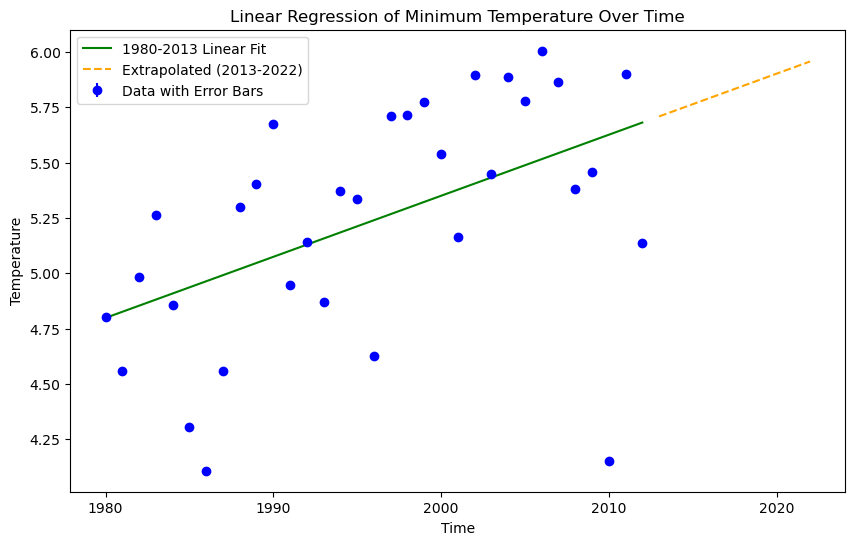

In [6]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_temp = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, temp_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_temp, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Minimum Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [7]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Temp': temp_future.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Temp': extrapolated_temp
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: 0.02759893628712905
Extrapolated Intercept: -49.84777582252627
   Year  Actual Temp  Predicted Temp
0  2013     5.111993        5.708883
1  2014     6.214119        5.736482
2  2015     5.415090        5.764081
3  2016     5.615657        5.791680
4  2017     5.945569        5.819279
5  2018     5.641670        5.846878
6  2019     5.677094        5.874477
7  2020     5.887306        5.902075
8  2021     5.604462        5.929674
9  2022     6.122156        5.957273


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Temp'], comparison_df['Predicted Temp'])
print(f"Mean Squared Error: {mse}")

R-squared: 0.012361869284514437
Mean Absolute Error: 0.26332855600458516
Mean Squared Error: 0.09673797764363995


Text(0, 0.5, 'Residuals')

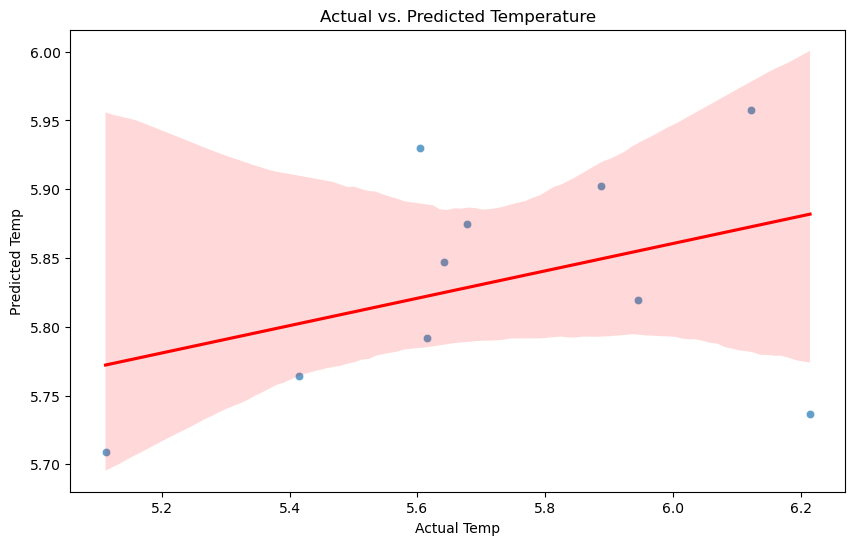

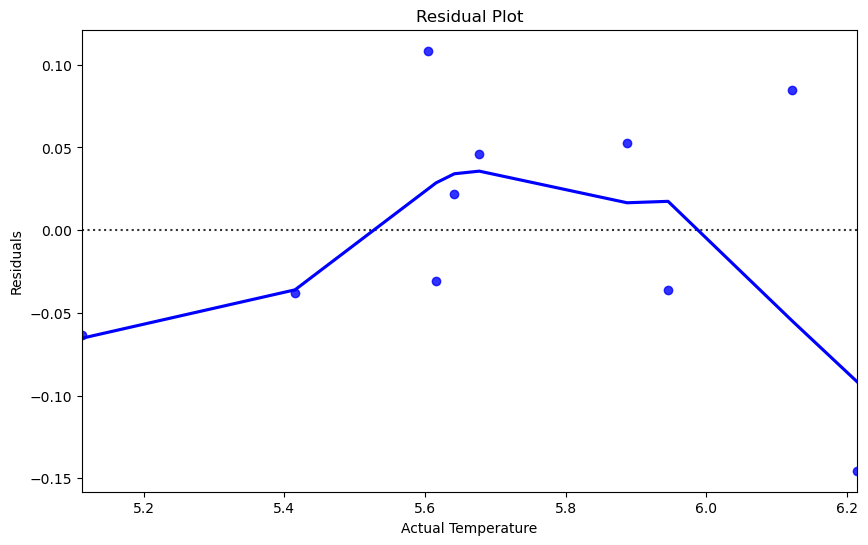

In [9]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Regression line
sns.regplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Temp', y='Predicted Temp', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals')

## Rainfall

Results for 1884-1980:
Slope: 0.04297567275872216
P-value: 0.018577974882312213
Z-score: 2.3811058163638044

Results for 1980-2023:
Slope: 0.09728453885753369
P-value: 0.39903615664819914
Z-score: 0.8522321966533944


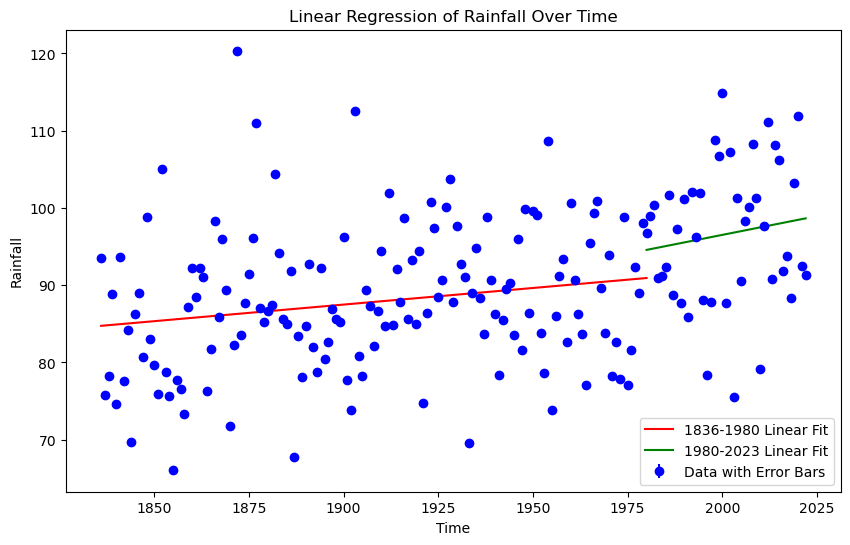

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Rain\*.nc", parallel=True)

# Extract variables
rain_array = np.array(data['rainfall'])
time = np.arange(1836, 2023)
rain = block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array))
rain = np.nanmean(rain, axis=(1, 2))
err= 0.057

future_rain = rain[-10:]

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
rain_segment1 = rain[:len(time_segment1)]

time_segment2 = time[time >= 1980]
rain_segment2 = rain[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(rain_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(rain_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1884-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1836-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: 0.13717253657385697
P-value: 0.4402771186765514
Z-score: 0.7817752518680199


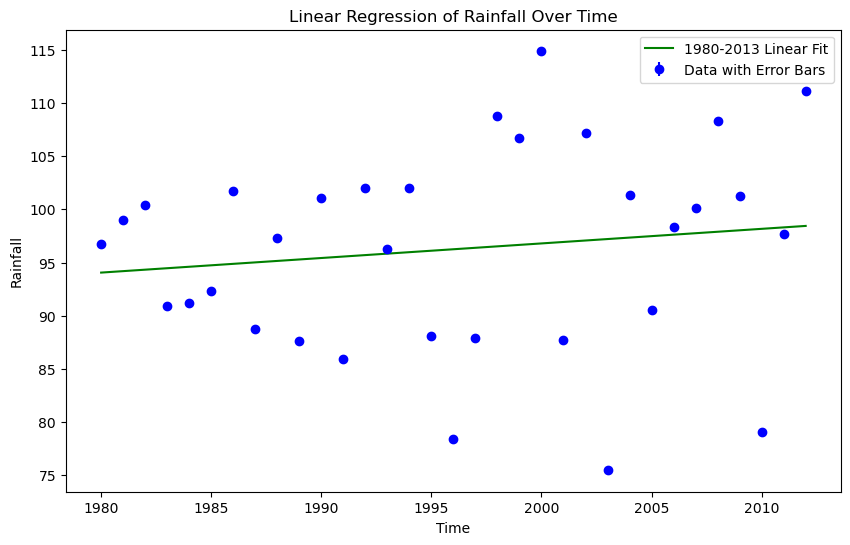

In [22]:
# Extract variables
rain_array = np.array(data['rainfall'])
time = np.arange(1980, 2013)
rain = block_reduce(rain_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(rain_array))
rain = np.nanmean(rain, axis=(1, 2))
rain = rain[:-10]
err= 0.057

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
rain_segment1 = rain[:len(time_segment1)]

time_segment2 = time[time >= 1980]
rain_segment2 = rain[-len(time_segment2):]

model_segment2 = sm.OLS(rain_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, rain_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

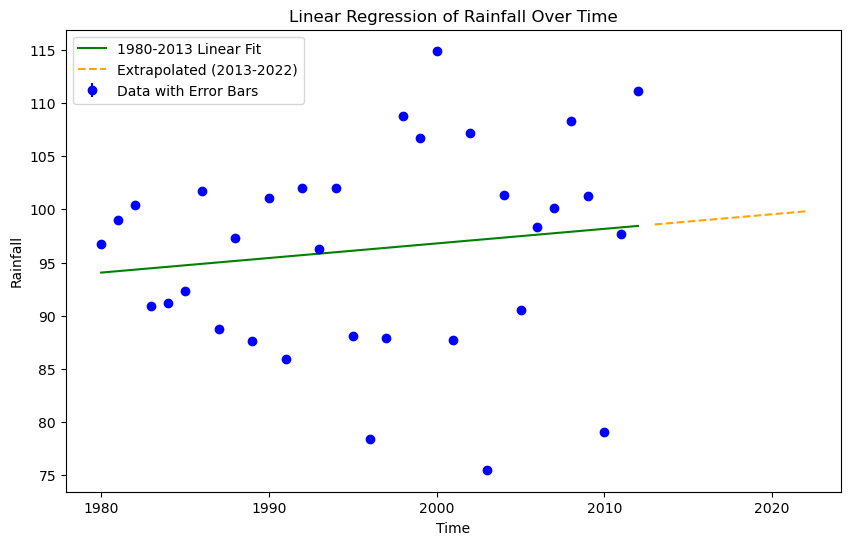

In [23]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_rain = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, rain_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_rain, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Rainfall Over Time')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

In [25]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Rain': future_rain.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Rain': extrapolated_rain
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: 0.13717253657385697
Extrapolated Intercept: -177.54716495514288
   Year  Actual Rain  Predicted Rain
0  2013    90.782661       98.581151
1  2014   108.191921       98.718324
2  2015   106.251358       98.855496
3  2016    91.829835       98.992669
4  2017    93.752964       99.129841
5  2018    88.287690       99.267014
6  2019   103.270605       99.404186
7  2020   111.908707       99.541359
8  2021    92.450793       99.678531
9  2022    91.379771       99.815704


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Rain'], comparison_df['Predicted Rain'])
print(f"Mean Squared Error: {mse}")

R-squared: -0.040823804650748974
Mean Absolute Error: 8.00844233686755
Mean Squared Error: 69.7332485537022


Text(0, 0.5, 'Residuals')

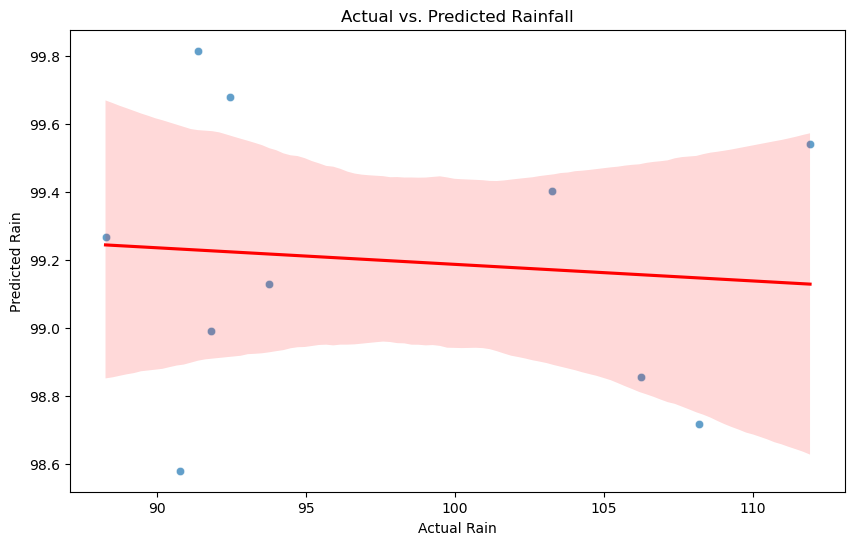

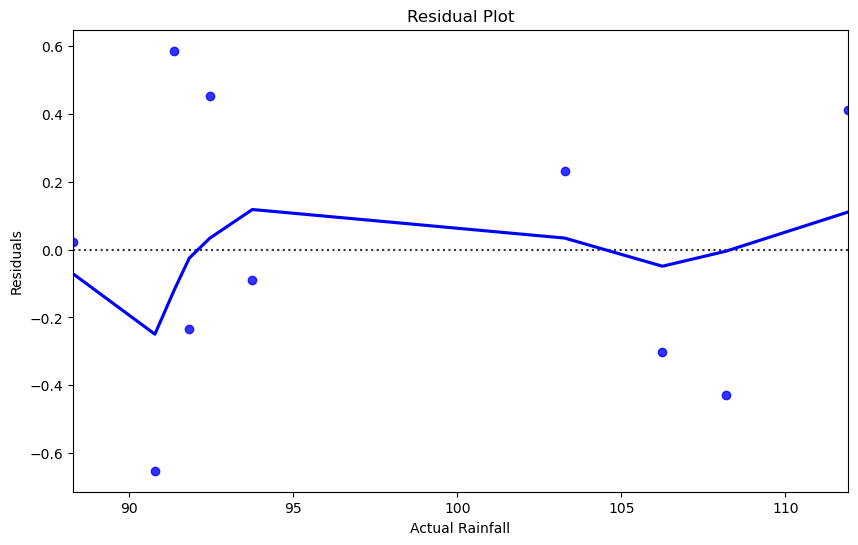

In [27]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')

# Regression line
sns.regplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Rain', y='Predicted Rain', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Rainfall')
plt.ylabel('Residuals')

## Wind Speed

Results for 1969-1980:
Slope: 0.017905670480234226
P-value: 0.35629536865620703
Z-score: 0.9671113082418891

Results for 1980-2023:
Slope: -0.008304086786027533
P-value: 0.0032064138768748474
Z-score: -3.1311797597553364


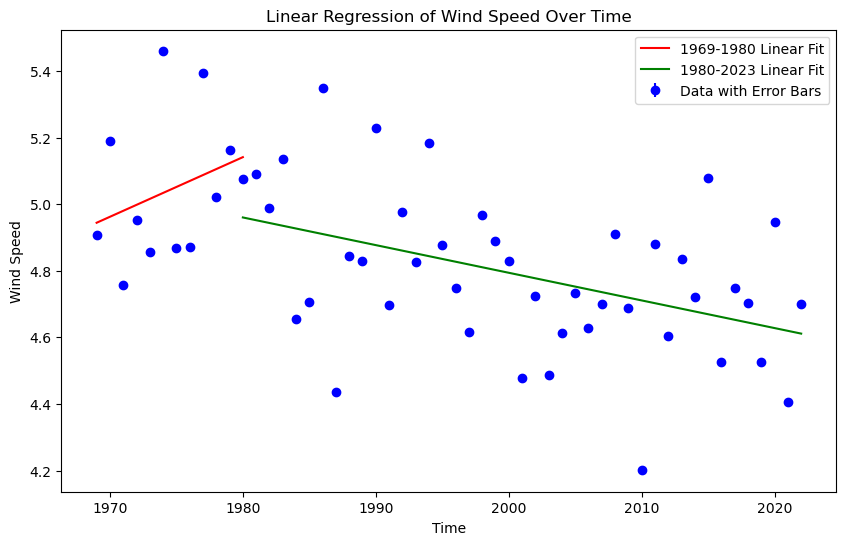

In [30]:
data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Wind\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['sfcWind'])
time = np.arange(1969, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

future_wind = wind[-10:]

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(wind_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1969-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1969-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: -0.008358355984197603
P-value: 0.032968572584521676
Z-score: -2.232148076955048


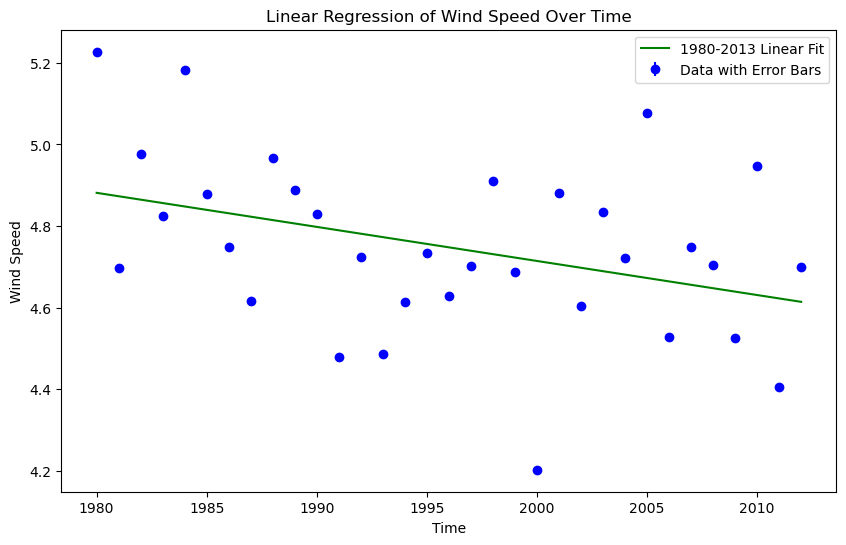

In [31]:
wind_array = np.array(data['sfcWind'])
time = np.arange(1980, 2013)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

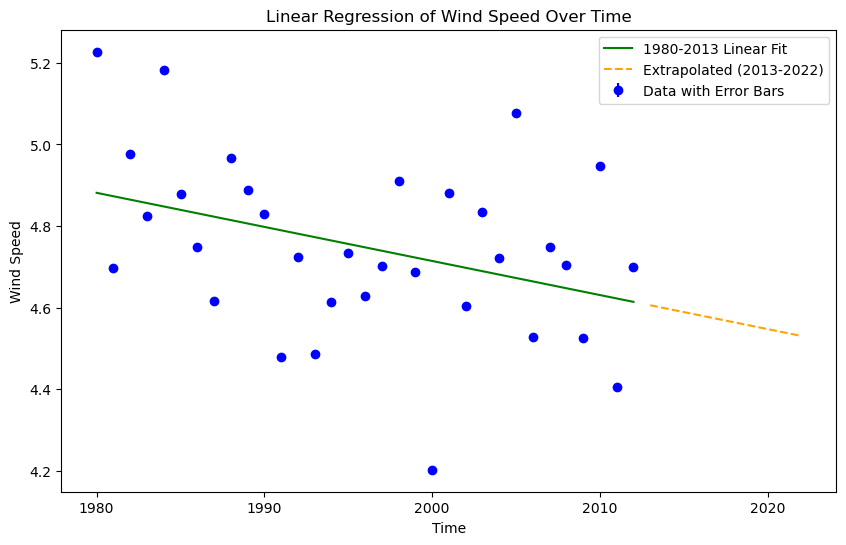

In [32]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_wind = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_wind, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.show()

In [34]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Wind': future_wind.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Wind': extrapolated_wind
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: -0.008358355984197603
Extrapolated Intercept: 21.43089075730648
   Year  Actual Wind  Predicted Wind
0  2013     4.834601        4.605520
1  2014     4.720519        4.597162
2  2015     5.077425        4.588803
3  2016     4.526567        4.580445
4  2017     4.747761        4.572087
5  2018     4.703949        4.563728
6  2019     4.525941        4.555370
7  2020     4.947384        4.547012
8  2021     4.404922        4.538653
9  2022     4.698671        4.530295


In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Wind'], comparison_df['Predicted Wind'])
print(f"Mean Squared Error: {mse}")

R-squared: -0.5397923548692503
Mean Absolute Error: 0.19427411919754406
Mean Squared Error: 0.05672708934074443


Text(0, 0.5, 'Residuals')

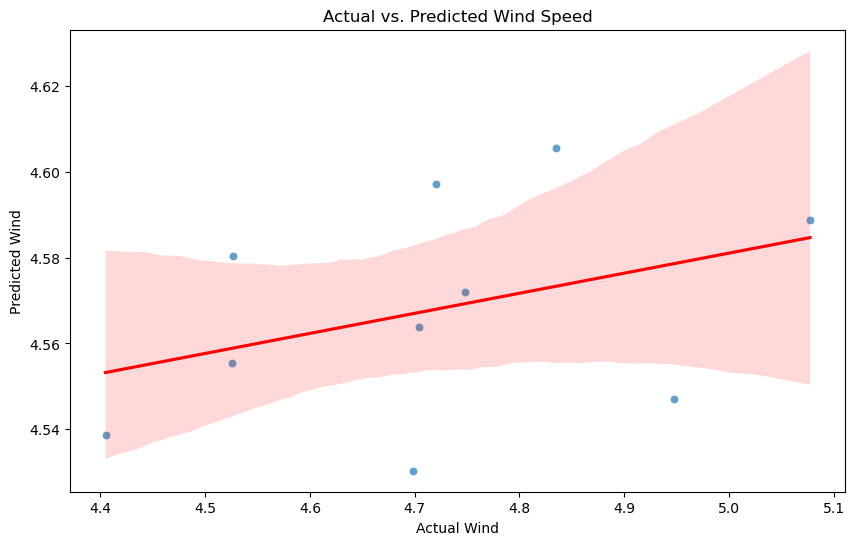

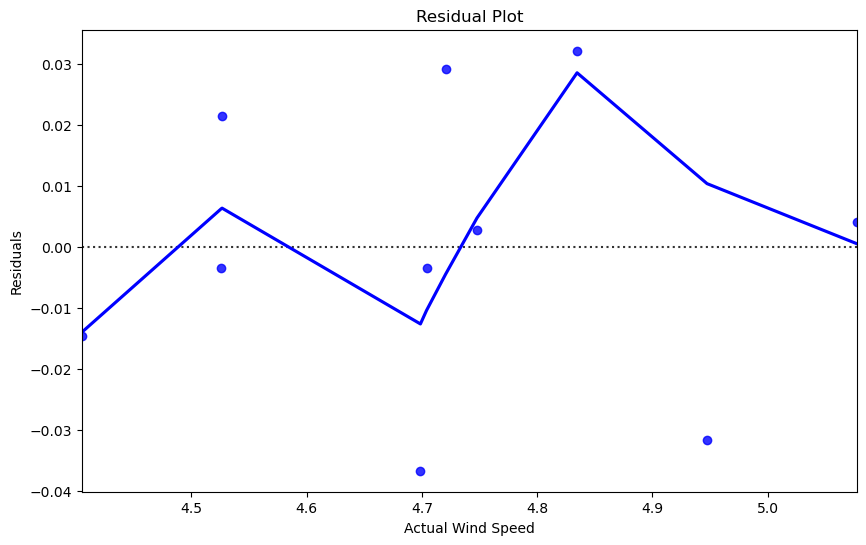

In [36]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Wind Speed')
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')

# Regression line
sns.regplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Wind', y='Predicted Wind', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Wind Speed')
plt.ylabel('Residuals')

## Humidity

Results for 1961-1980:
Slope: -0.023630580105463483
P-value: 0.34191703845961297
Z-score: -0.976171966418604

Results for 1980-2023:
Slope: 0.016611357064998417
P-value: 0.1753995340463258
Z-score: 1.3789091360313481


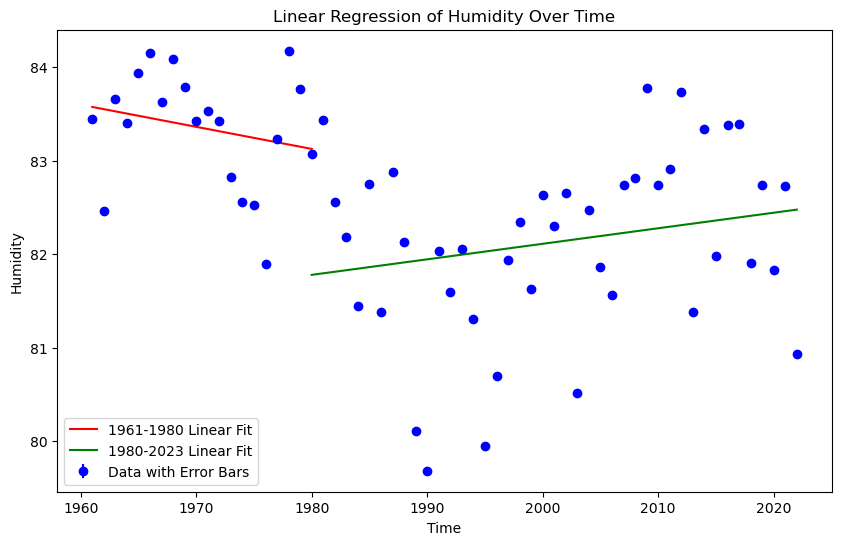

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Humidity\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['hurs'])
time = np.arange(1961, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

future_wind = wind[-10:]

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(wind_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1961-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1961-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: 0.04752342659213321
P-value: 0.007512401766847979
Z-score: 2.8601750833639996


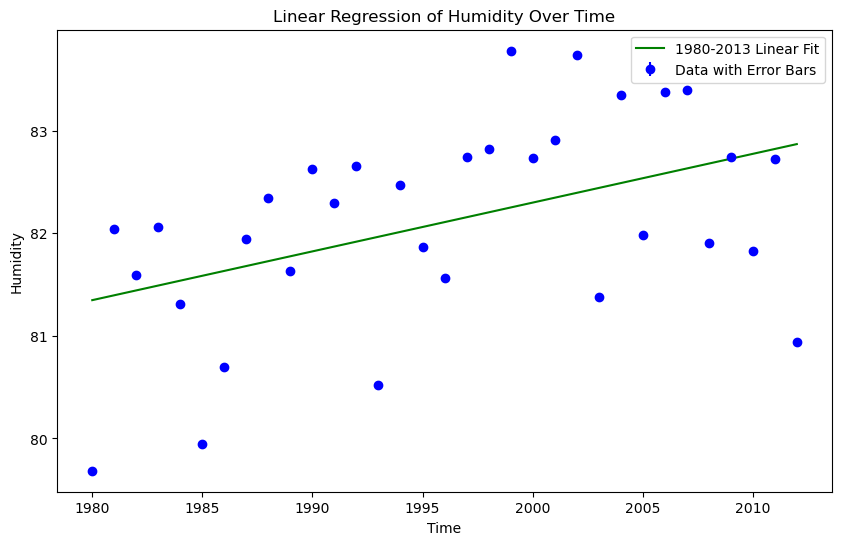

In [7]:
# Extract variables
wind_array = np.array(data['hurs'])
time_test = np.arange(1980, 2013)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()

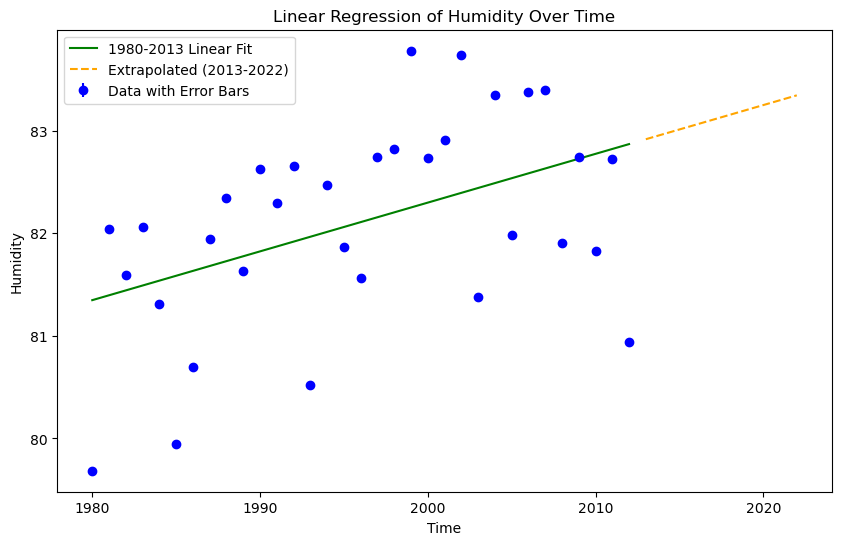

In [8]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_wind = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_wind, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.show()

In [9]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Humidity': future_wind.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Humidity': extrapolated_wind
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: 0.04752342659213321
Extrapolated Intercept: -12.7491196246051
   Year  Actual Humidity  Predicted Humidity
0  2013        81.377878           82.915538
1  2014        83.344048           82.963062
2  2015        81.977419           83.010585
3  2016        83.378172           83.058108
4  2017        83.392087           83.105632
5  2018        81.901780           83.153155
6  2019        82.737965           83.200679
7  2020        81.827022           83.248202
8  2021        82.725019           83.295726
9  2022        80.935507           83.343249


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Humidity'], comparison_df['Predicted Humidity'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Humidity'], comparison_df['Predicted Humidity'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Humidity'], comparison_df['Predicted Humidity'])
print(f"Mean Squared Error: {mse}")

R-squared: -0.9603562526130736
Mean Absolute Error: 0.9672046858763551
Mean Squared Error: 1.3684197521027652


Text(0, 0.5, 'Residuals')

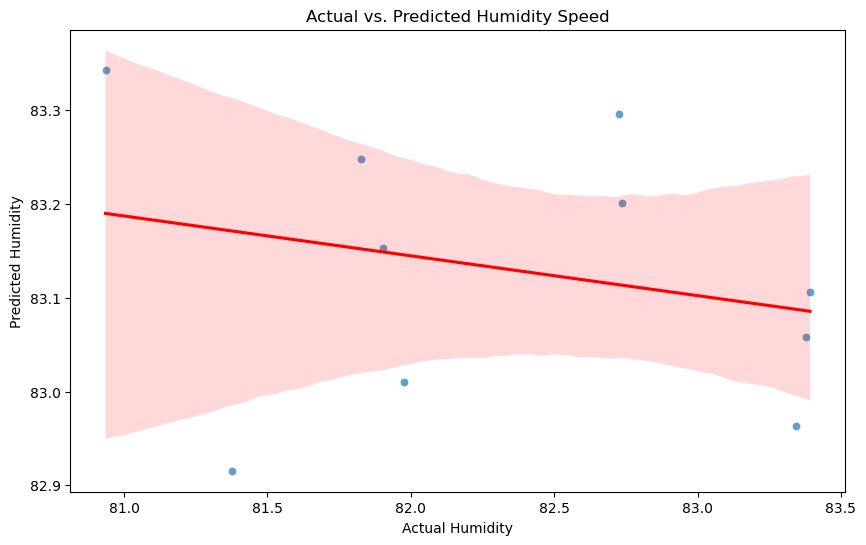

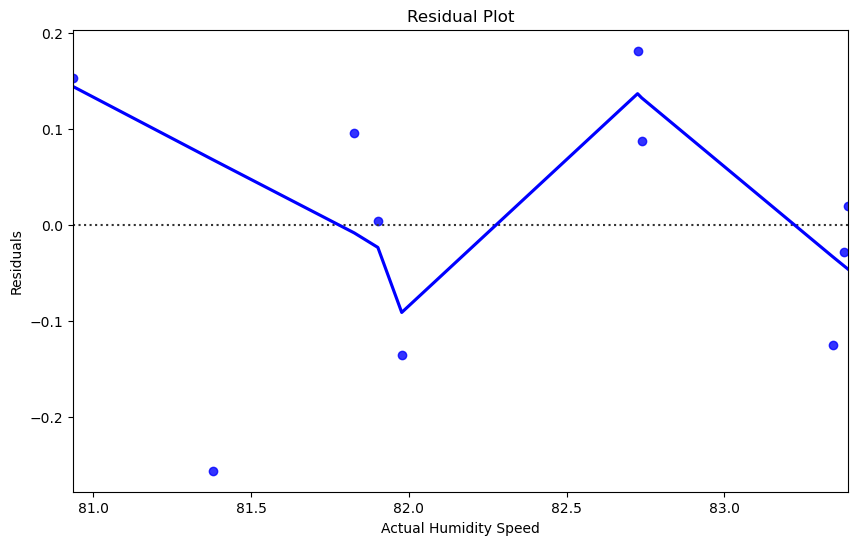

In [11]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Humidity', y='Predicted Humidity', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Humidity Speed')
plt.xlabel('Actual Humidity Speed')
plt.ylabel('Predicted Humidity Speed')

# Regression line
sns.regplot(x='Actual Humidity', y='Predicted Humidity', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Humidity', y='Predicted Humidity', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Humidity Speed')
plt.ylabel('Residuals')

## PSL 

Results for 1961-1980:
Slope: -0.0005635450868961556
P-value: 0.9929226368232054
Z-score: -0.00899427946934618

Results for 1980-2023:
Slope: -0.013376902580222616
P-value: 0.37078211293276375
Z-score: -0.9049441934507991


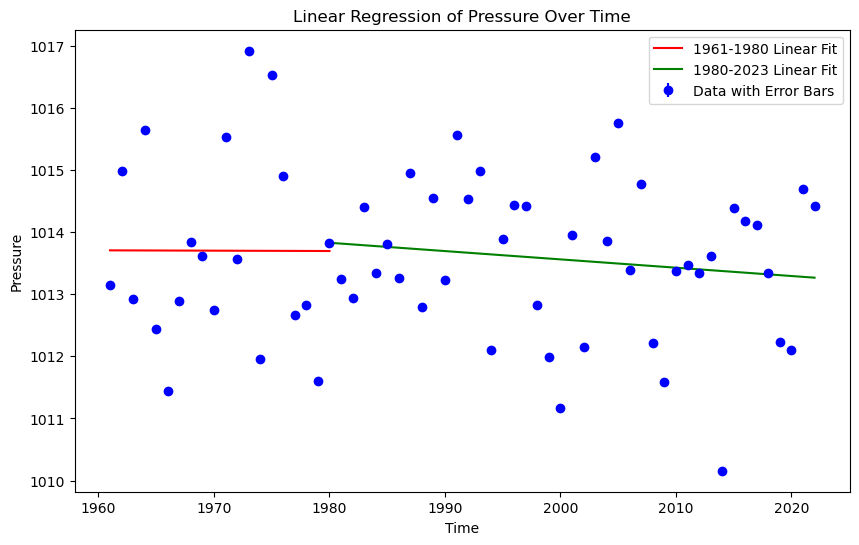

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_psl\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['psl'])
time = np.arange(1961, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

future_wind = wind[-10:]

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(wind_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1961-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1961-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: -0.01972109835677216
P-value: 0.4211305756451664
Z-score: -0.8152824844062939


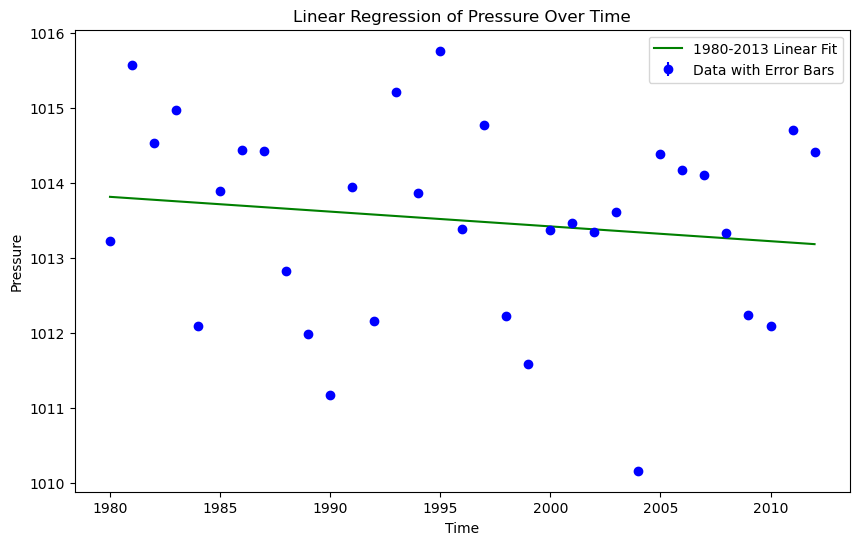

In [23]:
wind_array = np.array(data['psl'])
time = np.arange(1980, 2013)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()

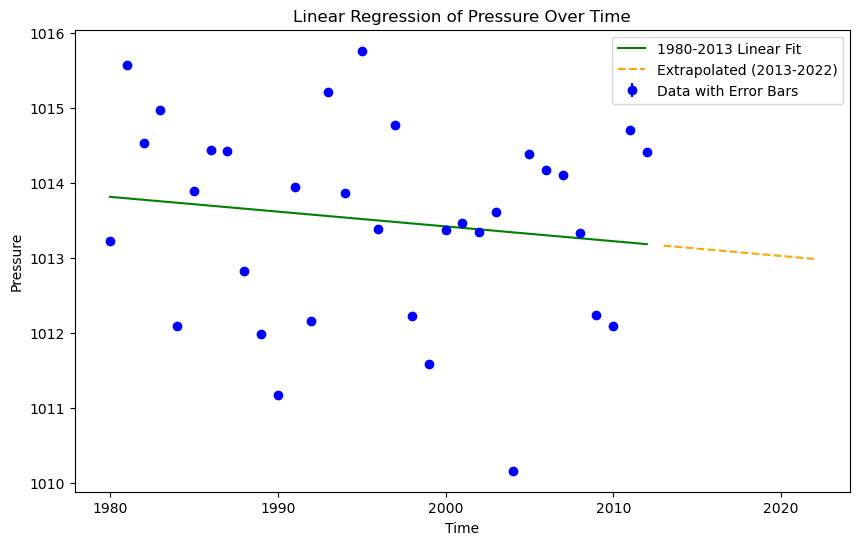

In [24]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_wind = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_wind, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()

In [25]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Pressure': future_wind.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Pressure': extrapolated_wind
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: -0.01972109835677216
Extrapolated Intercept: 1052.859856580866
   Year  Actual Pressure  Predicted Pressure
0  2013      1013.612814         1013.161286
1  2014      1010.160164         1013.141564
2  2015      1014.380086         1013.121843
3  2016      1014.176591         1013.102122
4  2017      1014.107295         1013.082401
5  2018      1013.332961         1013.062680
6  2019      1012.236671         1013.042959
7  2020      1012.094629         1013.023238
8  2021      1014.699185         1013.003517
9  2022      1014.415301         1012.983796


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Pressure'], comparison_df['Predicted Pressure'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Pressure'], comparison_df['Predicted Pressure'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Pressure'], comparison_df['Predicted Pressure'])
print(f"Mean Squared Error: {mse}")

R-squared: -0.058165695078657764
Mean Absolute Error: 1.19228853857868
Mean Squared Error: 1.9390654780410688


Text(0, 0.5, 'Residuals')

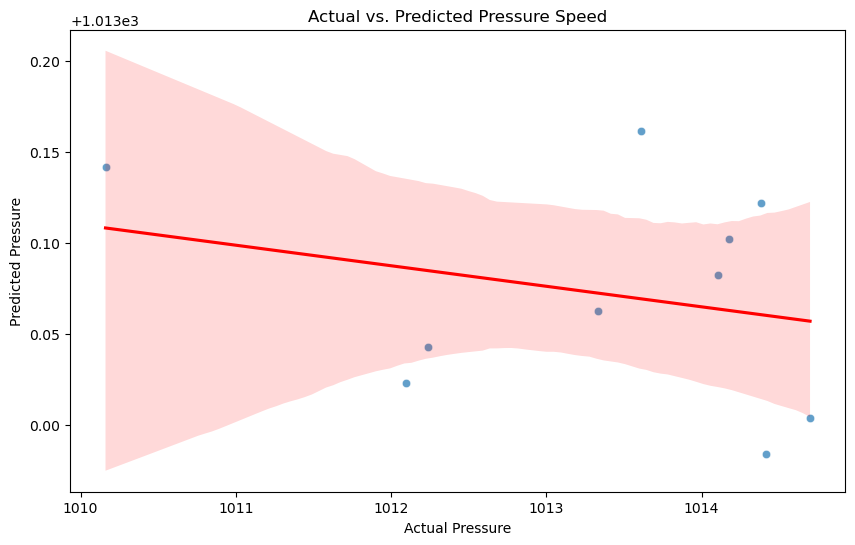

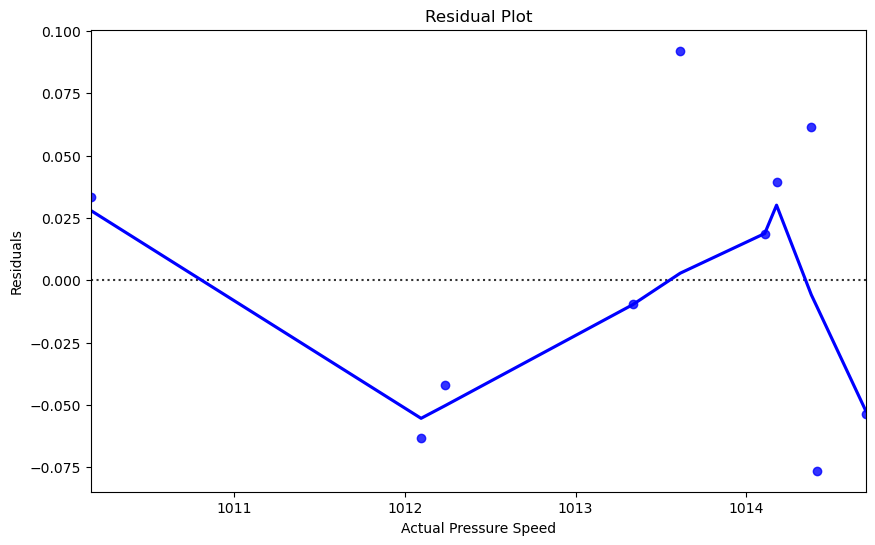

In [28]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Pressure', y='Predicted Pressure', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Pressure Speed')
plt.xlabel('Actual Pressure Speed')
plt.ylabel('Predicted Pressure Speed')

# Regression line
sns.regplot(x='Actual Pressure', y='Predicted Pressure', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Pressure', y='Predicted Pressure', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Pressure Speed')
plt.ylabel('Residuals')

## Frost

Results for 1961-1980:
Slope: 0.03055373277980636
P-value: 0.34769479221523214
Z-score: 0.9642552961114674

Results for 1980-2023:
Slope: -0.06017396087242676
P-value: 1.0486364377469386e-05
Z-score: -5.020904442248124


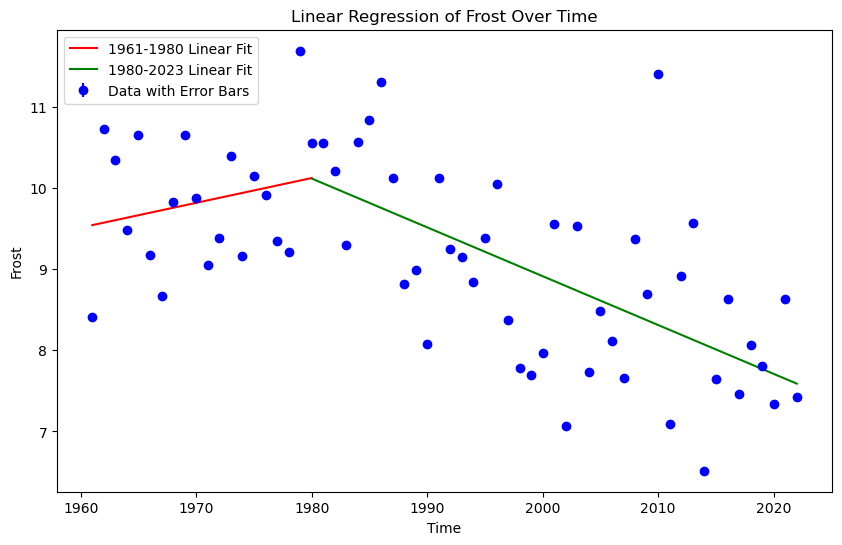

In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
import statsmodels.api as sm
from scipy import stats

data = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Frost\*.nc", parallel=True)

# Extract variables
wind_array = np.array(data['groundfrost'])
time = np.arange(1961, 2023)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

future_wind = wind[-10:]

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

# Fit linear regression model to each segment separately
model_segment1 = sm.OLS(wind_segment1, sm.add_constant(time_segment1))
results_segment1 = model_segment1.fit()

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 1
print("Results for 1961-1980:")
print("Slope:", results_segment1.params[1])
print("P-value:", results_segment1.pvalues[1])
print("Z-score:", results_segment1.params[1] / results_segment1.bse[1])

# Print out results for segment 2
print("\nResults for 1980-2023:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment1, results_segment1.fittedvalues, color='red', label='1961-1980 Linear Fit')
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2023 Linear Fit')

plt.title('Linear Regression of Frost Over Time')
plt.xlabel('Time')
plt.ylabel('Frost')
plt.legend()
plt.show()


Results for 1980-2013:
Slope: -0.03838505933468348
P-value: 0.04504789677757649
Z-score: -2.0886071970956332


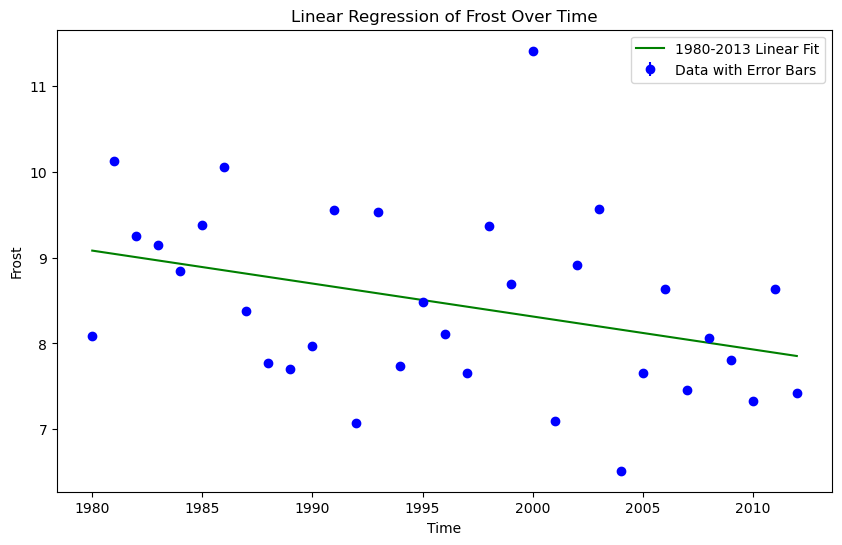

In [30]:
wind_array = np.array(data['groundfrost'])
time = np.arange(1980, 2013)
wind = block_reduce(wind_array, block_size=(12, 1, 1), func=np.mean, cval=np.mean(wind_array))
wind = np.nanmean(wind, axis=(1, 2))
err= 0.002

# Split time and temperature data into two segments
time_segment1 = time[time <= 1980]
wind_segment1 = wind[:len(time_segment1)]

time_segment2 = time[time >= 1980]
wind_segment2 = wind[-len(time_segment2):]

model_segment2 = sm.OLS(wind_segment2, sm.add_constant(time_segment2))
results_segment2 = model_segment2.fit()

# Print out results for segment 2
print("\nResults for 1980-2013:")
print("Slope:", results_segment2.params[1])
print("P-value:", results_segment2.pvalues[1])
print("Z-score:", results_segment2.params[1] / results_segment2.bse[1])

# Plotting with error bars
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression lines for each segment
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

plt.title('Linear Regression of Frost Over Time')
plt.xlabel('Time')
plt.ylabel('Frost')
plt.legend()
plt.show()

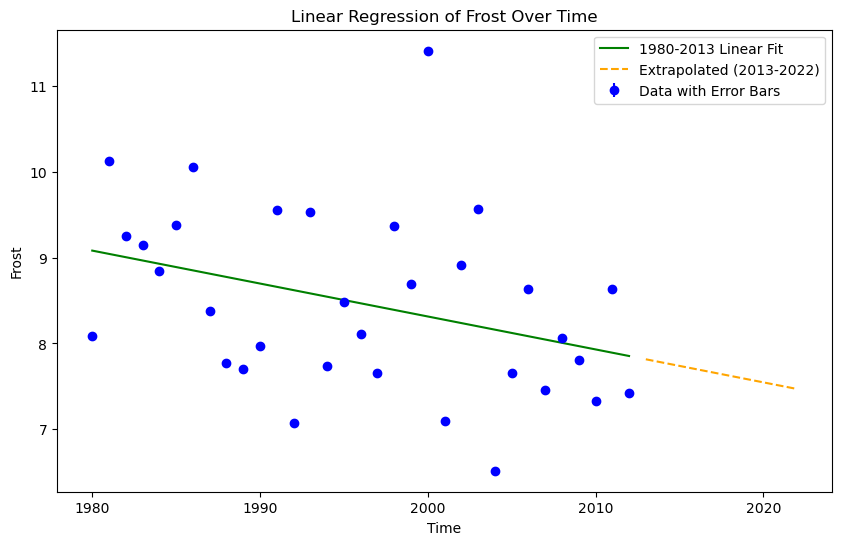

In [31]:
# Define the time period for extrapolation
time_extrapolation = np.arange(2013, 2023)

# Extrapolate temperature using the regression model for segment 1980-2013
extrapolated_wind = results_segment2.params[1] * time_extrapolation + results_segment2.params[0]

# Plotting with extrapolation
plt.figure(figsize=(10, 6))

# Scatter plot of the data with error bars
plt.errorbar(time_test, wind_segment2, yerr=err, fmt='o', color='blue', label='Data with Error Bars')

# Plotting the regression line for segment 1980-2013
plt.plot(time_segment2, results_segment2.fittedvalues, color='green', label='1980-2013 Linear Fit')

# Extrapolation plot
plt.plot(time_extrapolation, extrapolated_wind, color='orange', linestyle='--', label='Extrapolated (2013-2022)')

plt.title('Linear Regression of Frost Over Time')
plt.xlabel('Time')
plt.ylabel('Frost')
plt.legend()
plt.show()

In [32]:
import pandas as pd

# Extrapolated slope and intercept
extrapolated_slope = results_segment2.params[1]
extrapolated_intercept = results_segment2.params[0]



print("\nExtrapolation results (2013-2022):")
print("Extrapolated Slope:", extrapolated_slope)
print("Extrapolated Intercept:", extrapolated_intercept)


comparison_df = pd.DataFrame({
    'Year': time_extrapolation,
    'Actual Frost': future_wind.flatten(),  # Flatten to make sure it's a 1D array
    'Predicted Frost': extrapolated_wind
})

# Display the DataFrame
print(comparison_df)


Extrapolation results (2013-2022):
Extrapolated Slope: -0.03838505933468348
Extrapolated Intercept: 85.08439784118649
   Year  Actual Frost  Predicted Frost
0  2013      9.568828         7.815273
1  2014      6.518477         7.776888
2  2015      7.650615         7.738503
3  2016      8.632817         7.700118
4  2017      7.456562         7.661733
5  2018      8.066544         7.623348
6  2019      7.811875         7.584963
7  2020      7.332698         7.546578
8  2021      8.636358         7.508193
9  2022      7.418878         7.469808


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2 = r2_score(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"R-squared: {r2}")


mae = mean_absolute_error(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"Mean Absolute Error: {mae}")


mse = mean_squared_error(comparison_df['Actual Frost'], comparison_df['Predicted Frost'])
print(f"Mean Squared Error: {mse}")

R-squared: -0.07971832561391379
Mean Absolute Error: 0.6300805897432626
Mean Squared Error: 0.7147304950399229


Text(0, 0.5, 'Residuals')

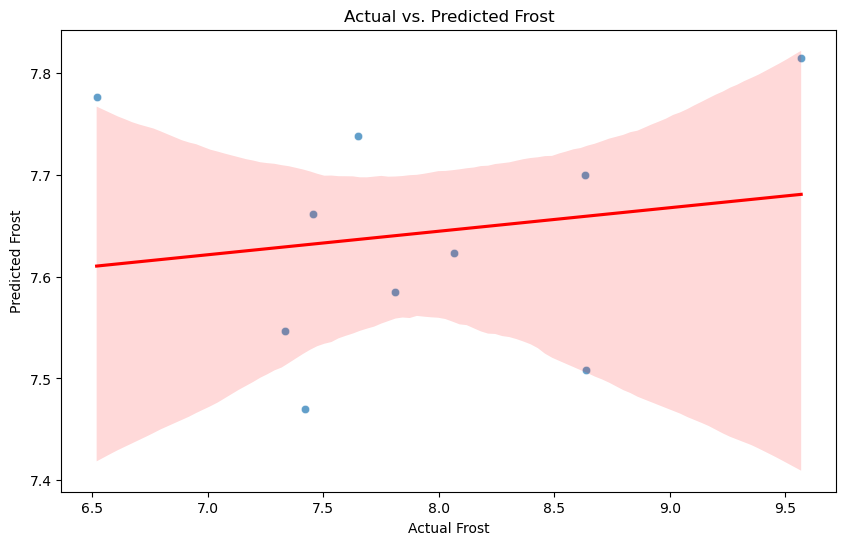

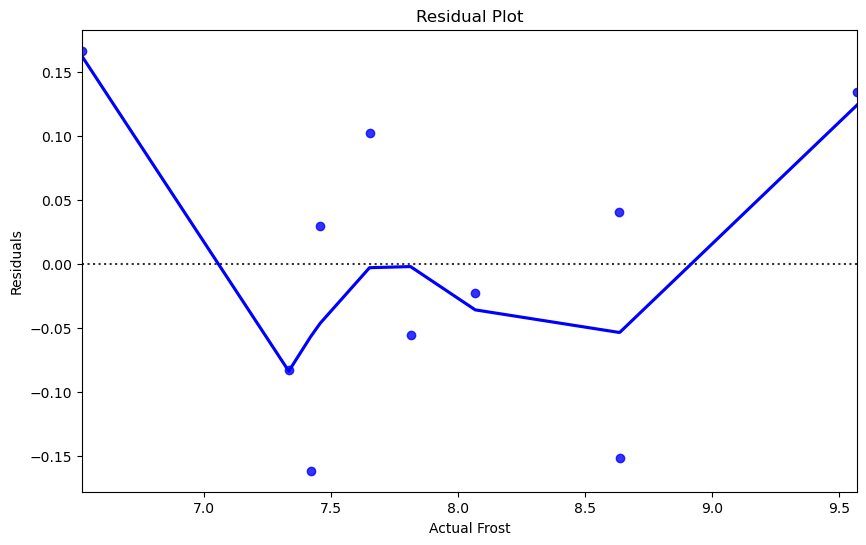

In [34]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, alpha=0.7)
plt.title('Actual vs. Predicted Frost')
plt.xlabel('Actual Frost')
plt.ylabel('Predicted Frost')

# Regression line
sns.regplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, scatter=False, color='red')

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x='Actual Frost', y='Predicted Frost', data=comparison_df, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Frost')
plt.ylabel('Residuals')